## Npy数据集

- 目前文件格式
- 总目录
    - lable 1
    - label 2
    - ...

- 将数据集保存为npy格式
- 一个数据集保存为四个npy文件
    - t10k-labels-idx1
    - t10k-images-idx3
    - train-labels-idx1
    - train-images-idx3

In [131]:
# 操作步骤
# - 图片连标签一起读入
# - 打乱顺序
# - 划分训练集和测试集
# - 输出四个文件

def image_label(imageLabel, label2idx, i):
    """返回图片的label
    """
    if imageLabel not in label2idx:
        label2idx[imageLabel]=i
        i = i + 1
    # 返回的是字典类型
    return label2idx, i

def image2npy(dir_path='./dogs_cats/', testScale = 0.1):
    """生成npy文件
    """
    i = 0
    label2idx = {}
    data = []
    for (root, dirs, files) in os.walk(dir_path):
        for Ufile in tqdm(files):
            # Ufile是文件名
            img_path = os.path.join(root, Ufile) # 文件的所在路径
            File = root.split('/')[-1] # 文件所在文件夹的名字, 也就是label
            
            # 读取image和label数据
            img_data = cv2.imread(img_path)
            img_data = cv2.resize(img_data, (64, 64)) # 调整图像大小
            label2idx, i = image_label(File, label2idx, i)
            label = label2idx[File] # 生成图像的label
            
            # 存储image和label数据
            data.append([np.array(img_data), label])
    random.shuffle(data) # 随机打乱,直接打乱data
    
    # 训练集和测试集的划分
    testNum = int(len(data)*testScale)
    train_data = data[:-1*testNum] # 训练集
    test_data = data[-1*testNum:] # 测试集

    # 测试集的输入输出和训练集的输入输出
    X_train = np.array([i[0] for i in train_data]) # 训练集特征
    y_train = np.array([i[1] for i in train_data]) # 训练集标签

    X_test = np.array([i[0] for i in test_data]) # 测试集特征
    y_test = np.array([i[1] for i in test_data]) # 测试集标签
    print(len(X_train), len(y_train), len(X_test), len(y_test))
    
    # 保存文件
    np.save('train-images-idx3.npy', X_train)
    np.save('train-labels-idx1.npy', y_train)
    np.save('t10k-images-idx3.npy', X_test)
    np.save('t10k-labels-idx1.npy', y_test)
    
    return label2idx

In [132]:
label2idx = image2npy(dir_path='./dogs_cats/', testScale=0.1)

0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:48<00:00, 115.73it/s]


22500 22500 2500 2500


In [105]:
label2idx

{'cat': 0, 'dog': 1}

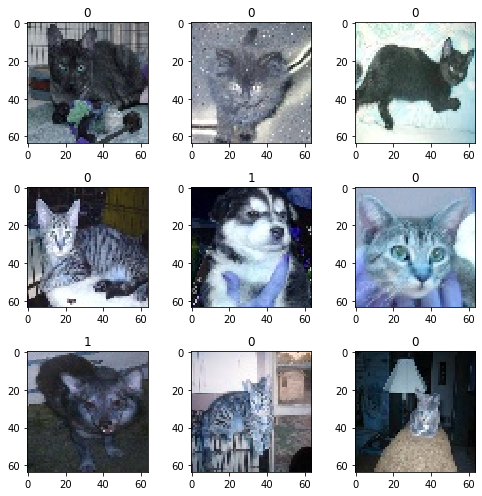

In [130]:
# 随机检查label与图片是否可以对应上
# - 从train中抽取9个image和9个label

image_no = np.random.randint(0,3602, size=9) # 随机挑选9个数字

train_images = np.load('./dogs_cats/train-images-idx3.npy')
train_labels = np.load('./dogs_cats/train-labels-idx1.npy')

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(7,7))

for i in range(3):
    for j in range(3):
        axes[i][j].imshow(train_images[image_no[i*3+j]])
        axes[i][j].set_title(train_labels[image_no[i*3+j]])
plt.tight_layout()

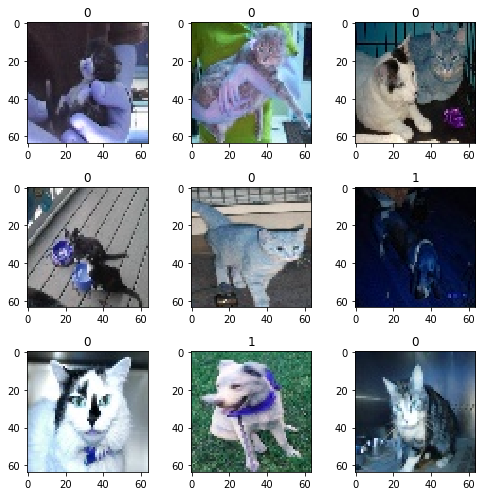

In [129]:
image_no = np.random.randint(0,402, size=9) # 随机挑选9个数字

test_images = np.load('./dogs_cats/t10k-images-idx3.npy')
test_labels = np.load('./dogs_cats/t10k-labels-idx1.npy')

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(7,7))

for i in range(3):
    for j in range(3):
        axes[i][j].imshow(test_images[image_no[i*3+j]])
        axes[i][j].set_title(test_labels[image_no[i*3+j]])
plt.tight_layout()